In [1]:
import datasets
from datasets import load_dataset
import math
import cv2
import PIL
import numpy as np
import random
import matplotlib.pyplot as plt


e:\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(0)

In [3]:
dataset = load_dataset("mnist")

e:\python\lib\site-packages\datasets\load.py:1454: FutureWarning: The repository for mnist contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mnist
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating test split: 100%|██████████| 10000/10000 [00:01<00:00, 8089.59 examples/s]


In [4]:
selected_images = []
selected_labels = []
d_image = {i : [] for i in range(10)}

d_label = {i : [] for i in range(10)}

In [5]:
train_images = dataset["train"]["image"]
train_labels = dataset["train"]["label"]

Select 100 from each class randomly

In [6]:
for image,label in zip(train_images,train_labels):
    d_image[label].append(image)
    d_label[label].append(label)
selected_images=[]
selected_labels = []
for i in range(10):
    index = random.sample(range(len(d_image[i])),100)
    selected_images.extend(d_image[i][j] for j in index)
    selected_labels.extend(d_label[i][j] for j in index)
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

Flatten the dataset - 28X28 - 784X1

In [7]:
dataset_flatten = [[] for i in range(len(selected_images))]
for i in range(len(selected_images)):
  dataset_flatten[i] =  selected_images[i].flatten()

In [8]:
np.array(dataset_flatten).shape

(1000, 784)

Centering the dataset

In [9]:
avg = np.mean(dataset_flatten, axis = 0)
centered_dataset = dataset_flatten - avg
features = centered_dataset.T
covariance_matrix = np.cov(features)


Eigenvalue and Eigenvector computation

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


In [11]:
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [12]:
eigenvalues_sort = list(np.argsort(eigenvalues))[::-1]
eigenvalues = eigenvalues[eigenvalues_sort]
eigenvectors =eigenvectors[:, eigenvalues_sort]


In [13]:

print(f'First 10 eigenvalues: {eigenvalues[:10]}')


First 10 eigenvalues: [336000.71420593 242099.10350798 213413.53562826 196891.00581537
 172965.73452645 144498.43810778 117705.74698667  97967.03050306
  93470.31369597  84427.8325045 ]


Plotting Eigen values

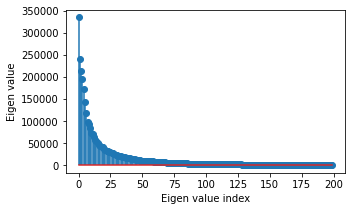

In [14]:
plt.figure(figsize=(5,3))
plt.stem(eigenvalues[:200], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [15]:
for i in range(700):
    exp_variance = np.sum(eigenvalues[:i+1])*100 / np.sum(eigenvalues)
    print(f'First {i+1} eigen vectors explain {exp_variance}% variance')

First 1 eigen vectors explain 9.807908157237014% variance
First 2 eigen vectors explain 16.87481507666805% variance
First 3 eigen vectors explain 23.10438623070541% variance
First 4 eigen vectors explain 28.85166241309964% variance
First 5 eigen vectors explain 33.90055655784449% variance
First 6 eigen vectors explain 38.118486311876794% variance
First 7 eigen vectors explain 41.55433363961993% variance
First 8 eigen vectors explain 44.4140050539561% variance
First 9 eigen vectors explain 47.14241667154673% variance
First 10 eigen vectors explain 49.60687698995918% variance
First 11 eigen vectors explain 51.74958549993075% variance
First 12 eigen vectors explain 53.794352015933505% variance
First 13 eigen vectors explain 55.67700782198712% variance
First 14 eigen vectors explain 57.36335342646127% variance
First 15 eigen vectors explain 58.96817128656274% variance
First 16 eigen vectors explain 60.446993678858256% variance
First 17 eigen vectors explain 61.80674320508312% variance
Firs

First 175 eigen vectors explain 96.95888567778853% variance
First 176 eigen vectors explain 96.99176725078661% variance
First 177 eigen vectors explain 97.0243158505483% variance
First 178 eigen vectors explain 97.05620512582428% variance
First 179 eigen vectors explain 97.08785776049454% variance
First 180 eigen vectors explain 97.1191646641332% variance
First 181 eigen vectors explain 97.15023308255712% variance
First 182 eigen vectors explain 97.18059918020006% variance
First 183 eigen vectors explain 97.21072047340158% variance
First 184 eigen vectors explain 97.24077592517052% variance
First 185 eigen vectors explain 97.27051297852702% variance
First 186 eigen vectors explain 97.29983091186273% variance
First 187 eigen vectors explain 97.32886300423195% variance
First 188 eigen vectors explain 97.35756043640099% variance
First 189 eigen vectors explain 97.38601435135894% variance
First 190 eigen vectors explain 97.41444931688243% variance
First 191 eigen vectors explain 97.4422223

In [16]:
for i in range(700):
    exp_variance = (eigenvalues[i])*100 / np.sum(eigenvalues)
    print(f'{i+1}st eigen vector explain {exp_variance}% variance')

1st eigen vector explain 9.807908157237014% variance
2st eigen vector explain 7.066906919431035% variance
3st eigen vector explain 6.2295711540373615% variance
4st eigen vector explain 5.747276182394228% variance
5st eigen vector explain 5.048894144744852% variance
6st eigen vector explain 4.217929754032307% variance
7st eigen vector explain 3.4358473277431334% variance
8st eigen vector explain 2.859671414336171% variance
9st eigen vector explain 2.728411617590626% variance
10st eigen vector explain 2.464460318412452% variance
11st eigen vector explain 2.1427085099715675% variance
12st eigen vector explain 2.0447665160027517% variance
13st eigen vector explain 1.882655806053623% variance
14st eigen vector explain 1.6863456044741498% variance
15st eigen vector explain 1.6048178601014742% variance
16st eigen vector explain 1.4788223922955044% variance
17st eigen vector explain 1.3597495262248729% variance
18st eigen vector explain 1.294406597515339% variance
19st eigen vector explain 1.2

In [17]:
def number_of_eigen_consider(eigenvalue,eigenvectors,percentage):
   eigenvaluecopy = list(eigenvalues.copy())
   eigenvectorcopy = list(eigenvectors.copy())
   total =  sum(eigenvalues)
   s = 0
   number_eigen_consider = 0

   while True :
      
      s  = s + eigenvaluecopy.pop(0)
      number_eigen_consider+=1
      if s/total >percentage:
         break
      if eigenvaluecopy == []:
         break
   return number_eigen_consider

Finding the number of eigenvectors to retain 99% information

In [18]:
number_eigen_consider = number_of_eigen_consider(eigenvalues,eigenvectors,0.99)
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
print(number_eigen_consider)

275


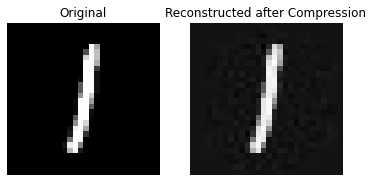

In [19]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)


Finding the number of eigenvectors to retain 95% information

In [20]:
number_eigen_consider = number_of_eigen_consider(eigenvalues,eigenvectors,0.95)
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
print(number_eigen_consider)

131


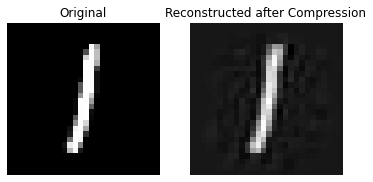

In [21]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

Finding the number of eigenvectors to retain all 100%  information

In [22]:
number_eigen_consider = number_of_eigen_consider(eigenvalues,eigenvectors,1)
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
print(number_eigen_consider)

784


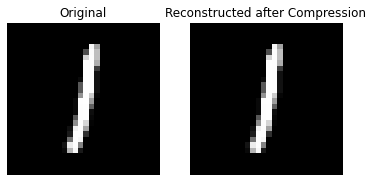

In [23]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

Finding the number of eigenvectors to retain 90% information

In [24]:
number_eigen_consider = number_of_eigen_consider(eigenvalues,eigenvectors,0.9)
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
print(number_eigen_consider)

77


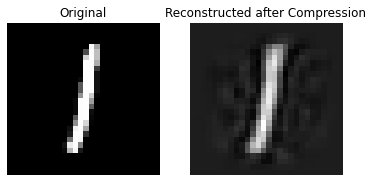

In [25]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

Finding the number of eigen vectors to retain 80% information

In [26]:
number_eigen_consider = number_of_eigen_consider(eigenvalues,eigenvectors,0.8)
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
print(number_eigen_consider)

40


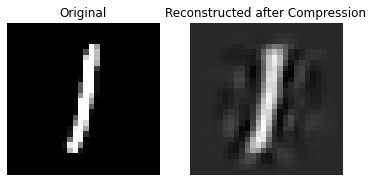

In [27]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

Question 1b - different number of dimensions d - reconstruct for different values of d - ie the number of top eigen vectors under consideration

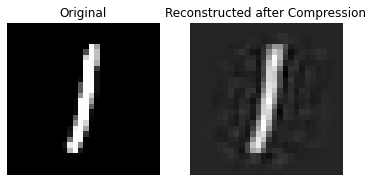

In [28]:
number_eigen_consider = 100
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

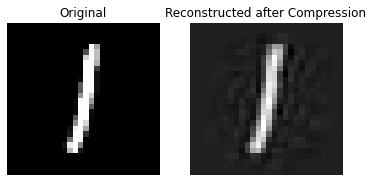

In [29]:
number_eigen_consider = 120
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

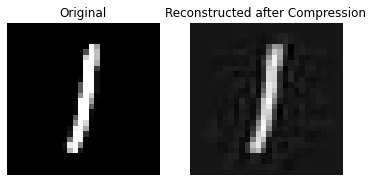

In [30]:
number_eigen_consider = 140
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

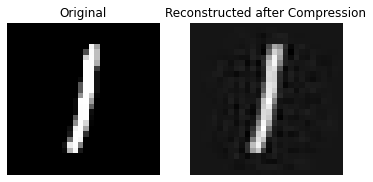

In [31]:
number_eigen_consider = 160
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

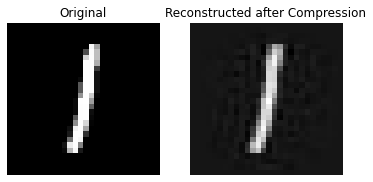

In [32]:
number_eigen_consider = 180
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

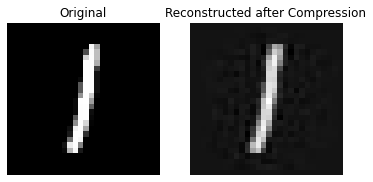

In [33]:
number_eigen_consider = 190
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

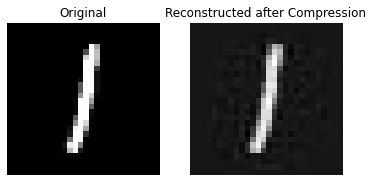

In [34]:
number_eigen_consider = 200
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

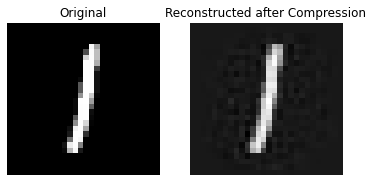

In [35]:
number_eigen_consider = 210
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

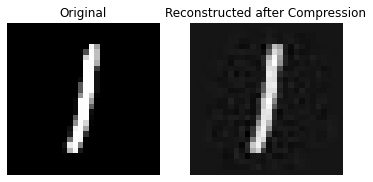

In [36]:
number_eigen_consider = 220
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

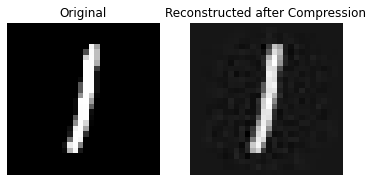

In [37]:
number_eigen_consider = 230
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

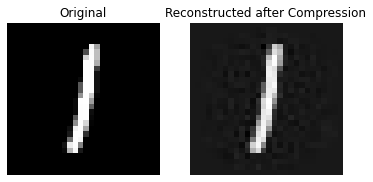

In [38]:
number_eigen_consider = 240
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

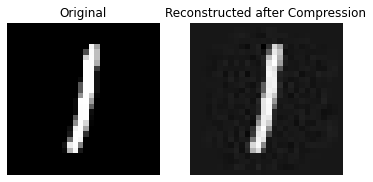

In [39]:
number_eigen_consider = 260
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

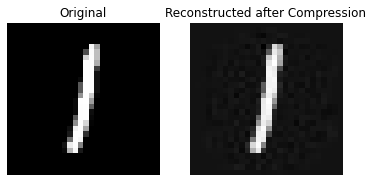

In [40]:
number_eigen_consider = 280
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

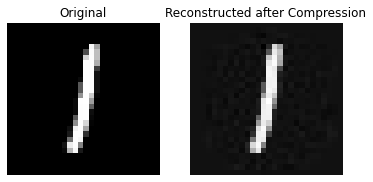

In [41]:
number_eigen_consider = 290
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

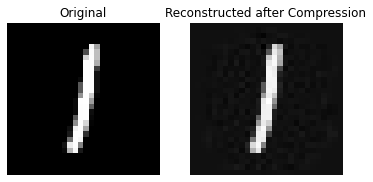

In [42]:
number_eigen_consider = 300
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

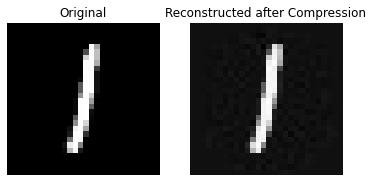

In [43]:
number_eigen_consider = 330
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

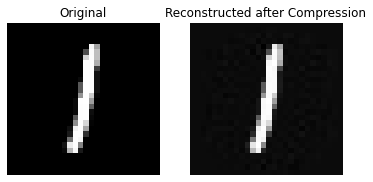

In [44]:
number_eigen_consider = 360
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

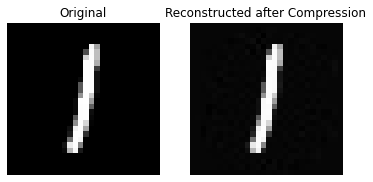

In [45]:
number_eigen_consider = 390
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

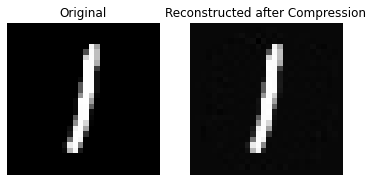

In [46]:
number_eigen_consider = 420
reduced_eigen_space = eigenvectors[:, :number_eigen_consider]
X_compressed = np.dot(centered_dataset, reduced_eigen_space)
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
data_reconstructed = (X_reconstructed) + avg
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(selected_images[155].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[155].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)

Question 1 part 3 : Kernel PCA

In [47]:
def polynomial_kernel(X,p):
    
    kernel_matrix = [[0 for i in range(len(X))] for j in range(len(X))]
    kernel_matrix = np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
           
            kernel_matrix[i][j] = (1+X[i].T @ X[j])**p         
    return kernel_matrix

In [48]:
def exponential_kernel(X,sigma):
    n = len(X)
    kernel_matrix = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            t = X[i] - X[j]
            kernel_matrix[i][j] = math.exp(-(np.dot(t,t))/(2*sigma*sigma))
    return kernel_matrix


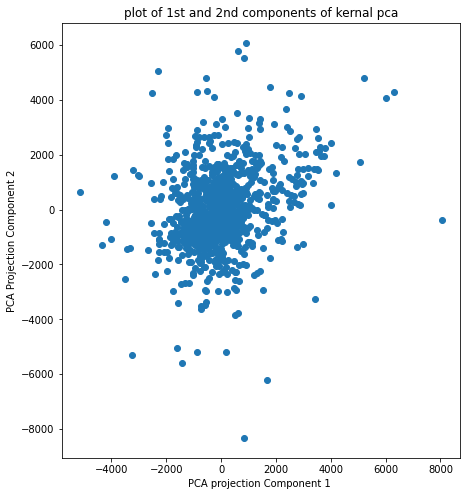

In [49]:
poly_dimension_kernel = polynomial_kernel(centered_dataset,2)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)
kernel_eigenvalues = abs(kernel_eigenvalues)
alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  

plt.xlabel('PCA projection Component 1 ')
plt.ylabel('PCA Projection Component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

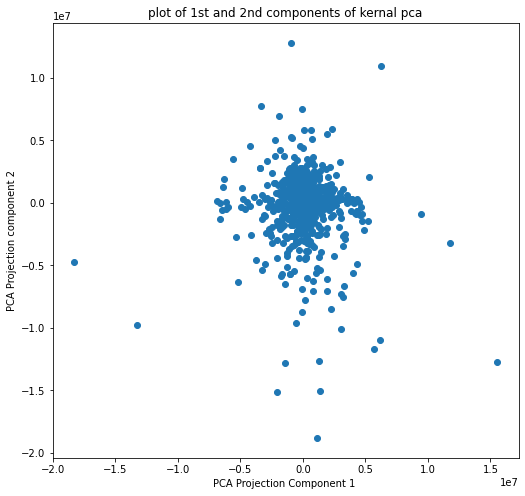

In [50]:
poly_dimension_kernel = polynomial_kernel(centered_dataset,3)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)
kernel_eigenvalues = abs(kernel_eigenvalues)
alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  

plt.xlabel('PCA Projection Component 1 ')
plt.ylabel('PCA Projection component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

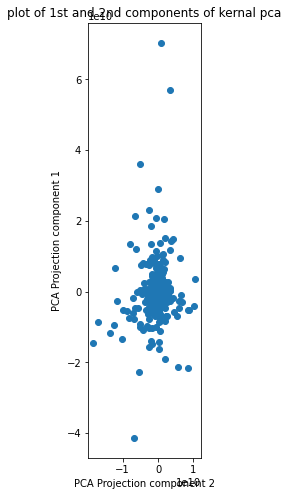

In [51]:
poly_dimension_kernel = polynomial_kernel(centered_dataset,4)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)
kernel_eigenvalues = abs(kernel_eigenvalues)
alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  

plt.xlabel('PCA Projection component 2')
plt.ylabel('PCA Projection component 1')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

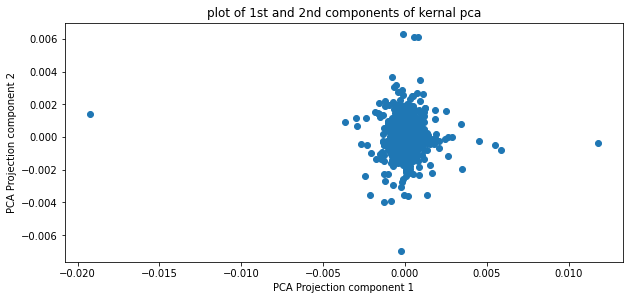

In [52]:
poly_dimension_kernel = exponential_kernel(centered_dataset,10)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)

alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  
plt.xlabel('PCA Projection component 1')
plt.ylabel('PCA Projection component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

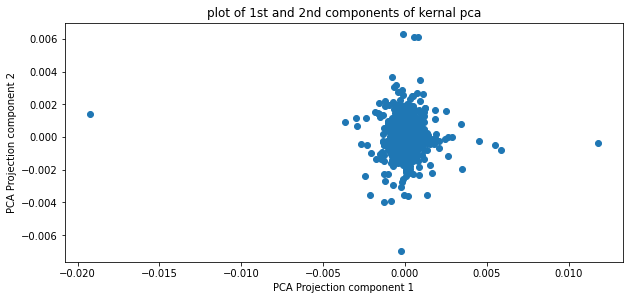

In [53]:
poly_dimension_kernel = exponential_kernel(centered_dataset,1)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)

alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  
plt.xlabel('PCA Projection component 1')
plt.ylabel('PCA Projection component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

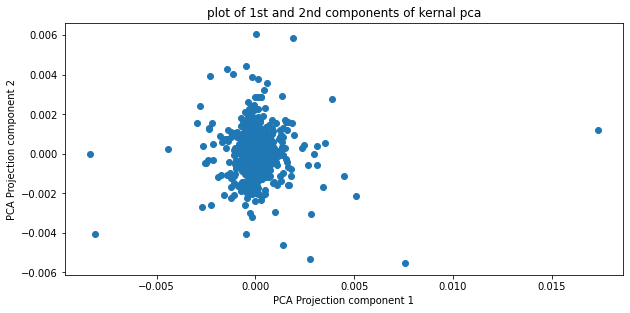

In [54]:
poly_dimension_kernel = exponential_kernel(centered_dataset,100)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)
kernel_eigenvalues = abs(kernel_eigenvalues)
alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  
plt.xlabel('PCA Projection component 1')
plt.ylabel('PCA Projection component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

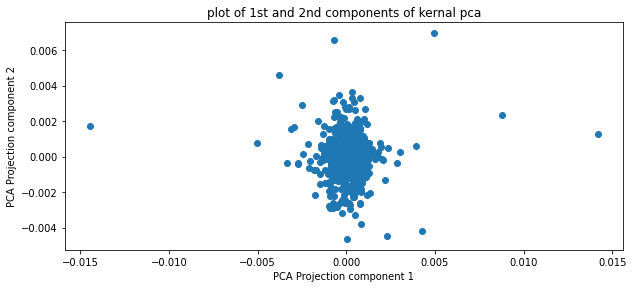

In [55]:
poly_dimension_kernel = exponential_kernel(centered_dataset,50)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)
kernel_eigenvalues = abs(kernel_eigenvalues)
alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  
plt.xlabel('PCA Projection component 1')
plt.ylabel('PCA Projection component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

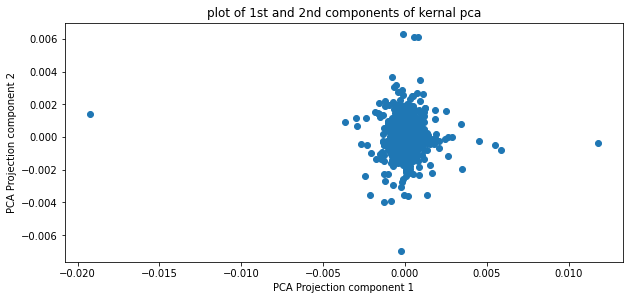

In [56]:
poly_dimension_kernel = exponential_kernel(centered_dataset,0.1)
poly_dimension_kernel_centered = [[0 for i in range(len(poly_dimension_kernel[1]))]for j in range(len(poly_dimension_kernel))]
row_sum = np.sum(poly_dimension_kernel,axis = 0) / len(poly_dimension_kernel)
number = len(poly_dimension_kernel) 
total_kernel = (np.sum(poly_dimension_kernel))/(number*number)
##Centering the kernel
for i in range(number):
    for j in range(number):
        poly_dimension_kernel_centered[i][j] = poly_dimension_kernel[i][j] - row_sum[i] - row_sum[j] + total_kernel
        if poly_dimension_kernel_centered[i][j] != poly_dimension_kernel_centered[j][i]:
            poly_dimension_kernel_centered[j][i] = poly_dimension_kernel_centered[i][j]
kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(poly_dimension_kernel_centered)
kernel_eigenvalues = abs(kernel_eigenvalues)
alpha_s = kernel_eigenvectors.copy()
for i in range(len(alpha_s)):
    alpha_s[i] = kernel_eigenvectors[i] / math.sqrt(number * kernel_eigenvalues[i])
final_feature_representation = []
for  i in range(len(centered_dataset)):
    l= []
    for k in range(len(alpha_s)):
        s= 0
        for j in range(len(alpha_s[0])):
            s = s + alpha_s[k][j]*poly_dimension_kernel_centered[i][j]
        l.append(s)
    final_feature_representation.append(l)
plot_list = []
for i in range(len(final_feature_representation)):
    top_two = final_feature_representation[i][-2:]
    plot_list.append(top_two)
plot_list= np.array(plot_list)
X_2 = plot_list[:, 0]
X_1 = plot_list[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_1, X_2)  
plt.xlabel('PCA Projection component 1')
plt.ylabel('PCA Projection component 2')
plt.title('plot of 1st and 2nd components of kernal pca')
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio

